In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
np.random.seed(42)

In [3]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [4]:
data = pd.read_excel('datasets/housing.xlsx', sep = ';')
data.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [5]:
data.to_csv('datasets/housing.csv', sep = ',')

In [6]:
data = pd.read_csv('datasets/housing.csv', sep = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
Unnamed: 0            20640 non-null int64
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(6), object(1)
memory usage: 1.7+ MB


In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  20640.000000  20640.000000  20640.000000        20640.000000   
mean   10319.500000   -119.569704     35.631861           28.639486   
std     5958.399114      2.003532      2.135952           12.585558   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5159.750000   -121.800000     33.930000           18.000000   
50%    10319.500000   -118.490000     34.260000           29.000000   
75%    15479.250000   -118.010000     37.710000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  20640.000000    20433.000000  20640.000000  20640.000000   
mean    2635.763081      537.870553   1425.476744    499.539680   
std     2181.615252      421.385070   1132.462122    382.329753   
min        2.000000        1.000000      3.000000      1.000000   
25%     1447.750000      296.000000    787.000000    280.000000   
50%     2127.000000      435.000000   1166.000000    409.000000   
75%     3148.000000      647.000000   1725.000000    605.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   20640.000000        20640.000000  
mean        3.870671       206855.816909  
std         1.899822       115395.615874  
min         0.499900        14999.000000  
25%         2.563400       119600.000000  
50%         3.534800       179700.000000  
75%         4.743250       264725.000000  
max        15.000100       500001.000000

In [9]:
fig, axs = plt.subplots(3,2)
axs[0][0].boxplot(data['total_rooms'])# Datos Atípicos
axs[0][1].boxplot(data['population']) # Datos Atípicos
axs[1][0].boxplot(data['households'])# Datos Atípicos
axs[1][1].boxplot(data['median_income'])# Datos Atípicos
axs[2][0].boxplot(data['median_house_value'])# Datos Atípicos

{'whiskers': [<matplotlib.lines.Line2D at 0x114a87950>,
 'caps': [<matplotlib.lines.Line2D at 0x114c71b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1147524d0>],
 'medians': [<matplotlib.lines.Line2D at 0x114a87110>],
 'fliers': [<matplotlib.lines.Line2D at 0x114c30910>],
 'means': []}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11406eb10>,
      dtype=object)

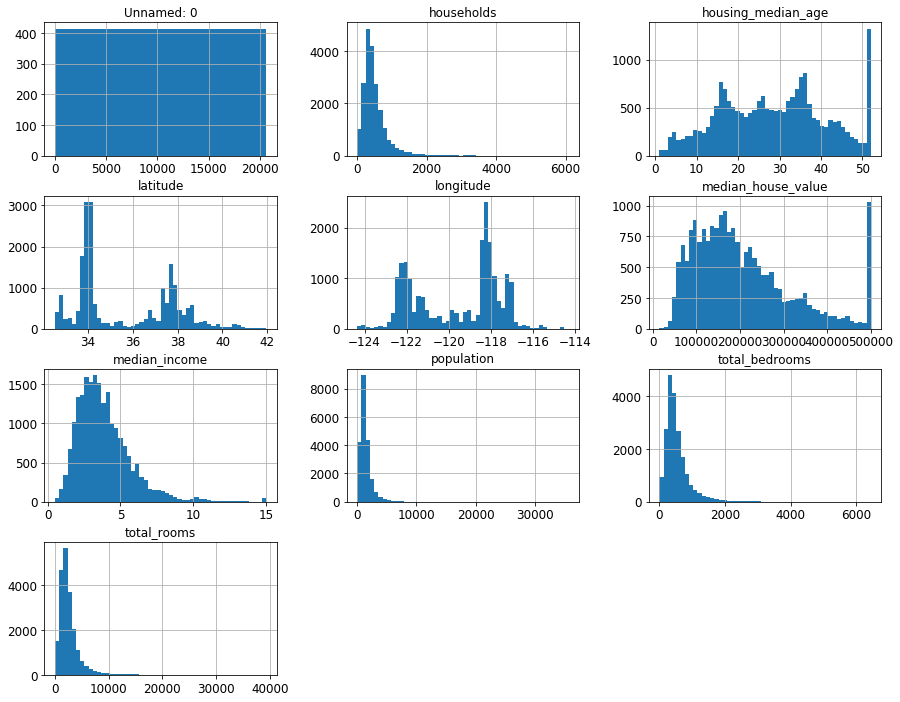

In [10]:
data.hist(bins = 50, figsize = (15,12))

Algunos de los conjuntos de datos mostrados en los anteriores gráficos muestran picos inesperados, esto es debido a que en la recolección de datos se toman rangos de valores, por ejemplo antiguedad de casas mayores a 50 años o valor medio de las casas mayores a un precio determinado. esto se nota normalmente en los bordes de las gráficas.

In [11]:
np.random.seed(42)
def split_train_test(data, test_ratio = 0.2):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(data, 0.2)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

No podemos barajar conjunto de datos de entrenamiento y de test de manera aleatoria. es decir, no se puede en una corrida elegir como registros de prueba algunos registros que antes fueron de entrenamiento o viceversa. Si configuramos una semilla para este random, los valores arrojados son los mismos y en el mismo orden.

In [13]:
%%time
np.random.seed(41)
np.random.permutation(9999999)

CPU times: user 13.2 s, sys: 946 ms, total: 14.2 s
Wall time: 22.9 s


array([57124716,  8457750, 61402998, ..., 36392930, 63762316,  3966912])

# Precisión vs Accuracy vs Sensibilidad

*__Precision__*: De lo que el sistema dijo que eran enfermos, cuántos realmente están enfermos.

*__Exactitud / Acurracy__*: La suma de los verdaderos positivos con los verdaderos negativos sobre la totalidad de casos analizados.

*__Sensibilidad / Recall__*: De todos los enfermos cuantos detectó el sistema como tales.

In [14]:
19/23

0.8260869565217391

In [15]:
9/11

0.8181818181818182

In [16]:
9/12

0.75

Algo que puede ayudar en la visualización de los datos es poner una densidad a los colores de cada punto en una gráfica.

- alpha: Transparencia de los puntos
- s = size
- c = clase o caracteristica del dataset para evaluar en el mapa de calor
- cmap = mapa de calor

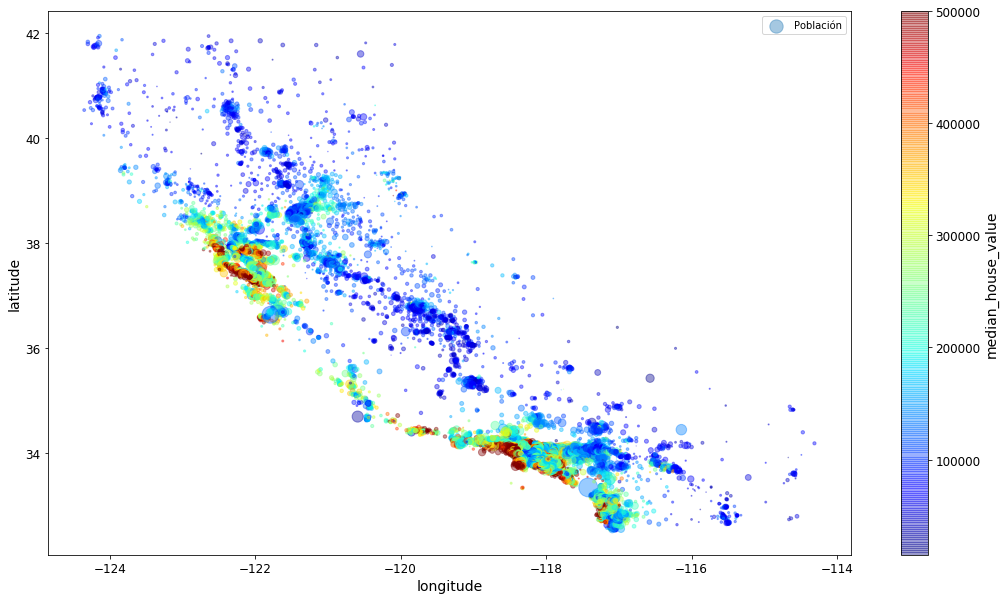

In [17]:
data.plot(kind = 'scatter',
          x = 'longitude',
          y = 'latitude',
          alpha = 0.4,
          s = data['population']/100,
          label = 'Población',
          figsize = (18,10),
          c = "median_house_value",
          cmap =  plt.get_cmap('jet'),
          colorbar = True,
          sharex = False
         )

# Correlación

La correlación de Pearson, indica la dependencia __lineal__ entre dos caracteristicas. La dependencia lineal indica que una caracteristica varía proporcionalmente a la variacion de otra caracteristica.
Determinar dependencias lineales nos ayuda a la selección de caracteristicas.
- Correlación: Una depende de la otra, pero no hay evidencia de causalidad.
- Causalidad: Una causa la otra.

$ \sum_{i=1}^n (X_i) - )$

In [18]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Unnamed: 0            0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Una correlación negativa indica que si aumenta una caracteristica la otra disminuye. Una correlación de 0.5 indica que si una caracteristica aumenta la otra aumenta en la mitad. Una correlación de 1 es el nivel máximo de dependencia lineal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114af0f10>,
      dtype=object)

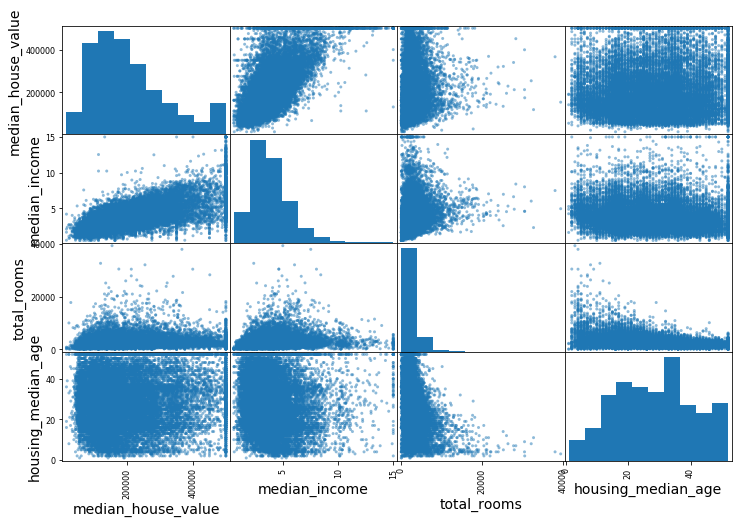

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms', 'housing_median_age']
scatter_matrix(data[attributes], figsize = (12,8))

*__median_income__* y *__median_house_value__* parecen estar relacionadas, miremos al detalle

[0, 16, 0, 550000]

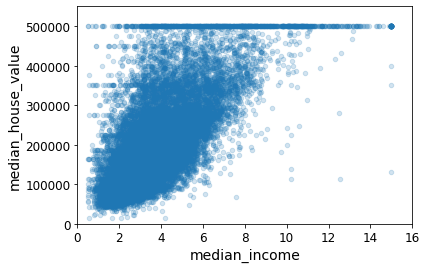

In [20]:
data.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.2)
plt.axis([0,16,0,550000])

# Combinación de Atributos

Aplicamos la combinacion de los atributos

In [21]:
data["rooms_per_household"] = data['total_rooms']/data['households']
data["bedrooms_per_room"] = data['total_bedrooms']/data['total_rooms']
data["population_per_household"] = data['population']/data['households']

In [22]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
Unnamed: 0                  0.072086
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Manejo de datos faltantes

### 1. Eliminar la caracteristica

In [23]:
data_incomplete = data[data.isnull().any(axis = 1)]
data_incomplete.drop("total_bedrooms", axis = 1).head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
290         290    -122.16     37.77                  47         1256   
341         341    -122.17     37.75                  38          992   
538         538    -122.28     37.78                  29         5154   
563         563    -122.24     37.75                  45          891   
696         696    -122.10     37.69                  41          746   

     population  households  median_income  median_house_value  \
290         570         218         4.3750              161900   
341         732         259         1.6196               85100   
538        3741        1273         2.5762              173400   
563         384         146         4.9489              247100   
696         387         161         3.9063              178400   

    ocean_proximity  rooms_per_household  bedrooms_per_room  \
290        NEAR BAY             5.761468                NaN   
341        NEAR BAY             3.830116                NaN   
538        NEAR BAY             4.048704                NaN   
563        NEAR BAY             6.102740                NaN   
696        NEAR BAY             4.633540                NaN   

     population_per_household  
290                  2.614679  
341                  2.826255  
538                  2.938727  
563                  2.630137  
696                  2.403727

### 2. Eliminar el registro particular

### 3. Rellenar con la Media, Mediana, Max, Min, Cero, Moda

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

Debemos quitar los datos categoricos

In [25]:
data_num = data.drop("ocean_proximity", axis = 1)
imputer.fit(data_num)
imputer.statistics_

array([ 1.03195000e+04, -1.18490000e+02,  3.42600000e+01,  2.90000000e+01,
        2.12700000e+03,  4.35000000e+02,  1.16600000e+03,  4.09000000e+02,
        3.53480000e+00,  1.79700000e+05,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

# Importante
Hay que tener en cuenta que pueden existir datos faltantes en datos de prueba; en este caso se debe aplicar la misma estrategia que se aplicó en los datos de __entrenamiento__, no se aplica un rellenado de datos en datos de pruebas